## Completion Rate Metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv("classroom_actions.csv")
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [48]:
df.shape[0]

3829

### 1. Hypothesis test

$$ H_0: u_{new} - u_{old} \leqslant 0$$

$$ H_1: u_{new} - u_{old} > 0$$

### 2. Control group

In [28]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Completion ration
control_cr = control_df[control_df["completed"] == True].id.nunique() / control_df.id.nunique()

control_cr

0.3719951923076923

### 3. Experiment group

In [29]:
experiment_df = df.query('group == "experiment"')

experiment_cr = experiment_df[experiment_df["completed"] == True].id.nunique() / experiment_df.id.nunique()

experiment_cr

0.3935334872979215

### 4. Observed difference between control and experiment group

In [30]:
obs_diff = experiment_cr - control_cr
obs_diff

0.02153829499022919

### 5. Bootstrap for sampling distribution of difference

In [ ]:
diffs = []

for _ in range(10000):
    bootsamp = df.sample(3829, replace=True)
    control_df = bootsamp.query('group == "control"')
    experiment_df = bootsamp.query('group == "experiment"')
    # pretty smart
    control_cr = control_df["completed"].mean()
    experiment_cr = experiment_df["completed"].mean()
    diff = experiment_cr - control_cr
    diffs.append(diff)

In [50]:
diffs = np.array(diffs)
std_diffs = diffs.std()

In [51]:
std_diffs

0.012117448625382913

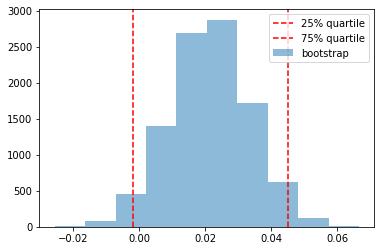

In [52]:
plt.hist(diffs, alpha=0.5)
plt.axvline(np.percentile(diffs, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(diffs, 97.5), c='r', ls='dashed')
plt.legend(['25% quartile','75% quartile', 'bootstrap'])

### 6. Simulation with Null Hypothesis

In [53]:
null_vals = np.random.normal(0, std_diffs, 10000)


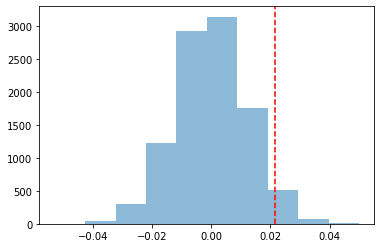

In [54]:
plt.hist(null_vals, alpha=0.5)
plt.axvline(x=obs_diff, ls='dashed', c='r')

### 7. P-value calculation

In [55]:
(null_vals > obs_diff).mean()

0.0395

### 8. Conclusion

**P-value is 4% , which is less than 5%. As such, in terms of statistical significance, we will launch the new feature**